In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(42)

## 生成数据

In [2]:
years = [2008, 2013, 2018, 2023]
categories = ['NLI', 'GDP', 'ROD', 'GTEM', 'TEM', 'NPP', 'NDVI', 'SLO', 'DEM', 'PB', 'PF', 'PC']
data_dict = {cat: np.random.rand(len(years)) for cat in categories}
df = pd.DataFrame(data_dict, index=years)
df.reset_index(inplace=True)
df.rename(columns={'index':'year'}, inplace=True)

In [3]:
df

,year,NLI,GDP,ROD,GTEM,TEM,NPP,NDVI,SLO,DEM,PB,PF,PC
0,2008,0.374540,0.156019,0.601115,0.832443,0.304242,0.611853,0.456070,0.592415,0.065052,0.304614,0.122038,0.258780
1,2013,0.950714,0.155995,0.708073,0.212339,0.524756,0.139494,0.785176,0.046450,0.948886,0.097672,0.495177,0.662522
2,2018,0.731994,0.058084,0.020584,0.181825,0.431945,0.292145,0.199674,0.607545,0.965632,0.684233,0.034389,0.311711
3,2023,0.598658,0.866176,0.969910,0.183405,0.291229,0.366362,0.514234,0.170524,0.808397,0.440152,0.909320,0.520068


## 可视化

In [4]:
colors = ['#86c0e7', '#9dc5a7', '#f3caa3', '#e4a4aa']

years = list(df['year'])  # 年份
N_years = len(years)

theta = np.linspace(0, 2 * np.pi, N_years, endpoint=False)  # 均匀分布角度
bar_width = 2 * np.pi / (N_years * (df.shape[0] + 2))  # 控制年份间距
bottom = 0.3  # 控制离圆心距离
wedge_angle = 2 * np.pi / (N_years)  # 每个年份所占的弧度宽度

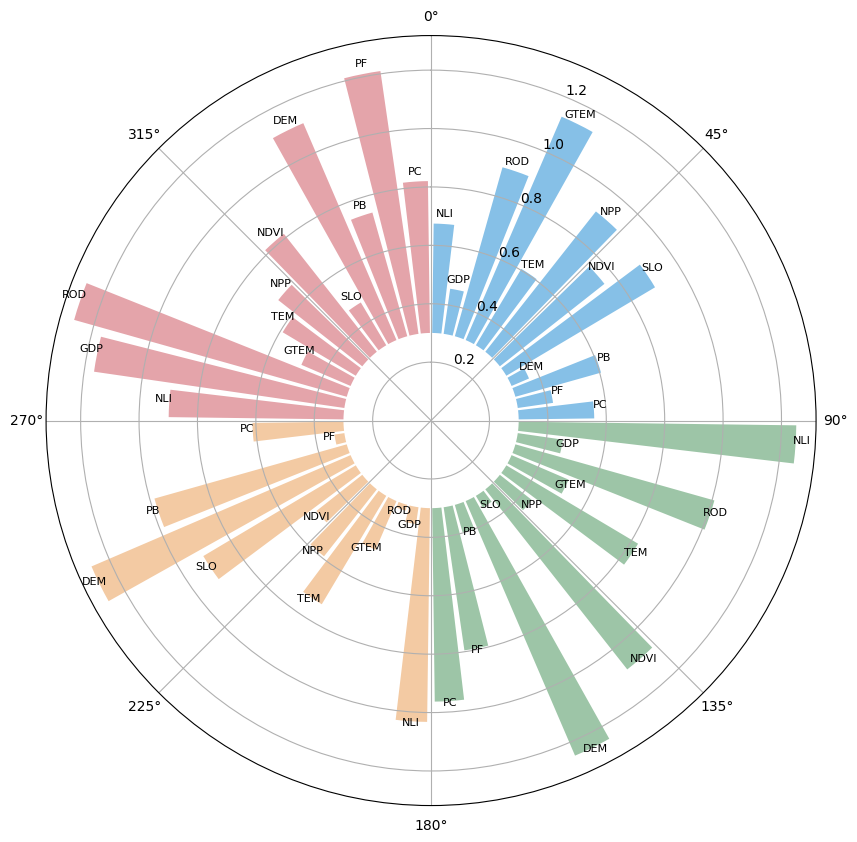

In [5]:
# 绘图
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location("N")  # 设置0°为正北方向
ax.set_theta_direction(-1)

# 遍历每一行数据（每个年份）
for i, row in df.iterrows():
    # 以扇区中心为基准，计算扇区起始和结束角度
    sector_center = (i + 0.5) * wedge_angle
    start_angle = sector_center - wedge_angle / 2
    end_angle = sector_center + wedge_angle / 2
    # 对于负角度进行调整（转换到0-360范围内）
    if start_angle < 0:
        start_angle += 2 * np.pi
        end_angle += 2 * np.pi

    # 当前年份所有指标数据（去除年份列）
    indicators = row.drop('year')
    num_indicators = len(indicators)

    # 将当前扇区均分为num_indicators份，每份中心作为柱子绘制位置
    delta = (end_angle - start_angle) / num_indicators
    bar_angles = np.linspace(start_angle + delta/2, end_angle - delta/2, num_indicators)
    # 柱形宽度设为分段宽度的一定比例，保证柱子之间有间隔
    bar_width = delta * 0.8

    # 绘制每个指标的柱状图并添加标签
    for j, (cat, value) in enumerate(indicators.items()):
        bar = ax.bar(bar_angles[j], value, width=bar_width, bottom=bottom,
            color=colors[i % len(colors)], edgecolor='k', alpha=1, lw=0)

        # 添加指标标签
        angle = bar_angles[j]
        radius = bottom + value + 0.02  # 标签位置略高于柱子顶部
        ax.text(angle, radius, cat, ha='center', va='bottom', fontsize=8)

plt.show()

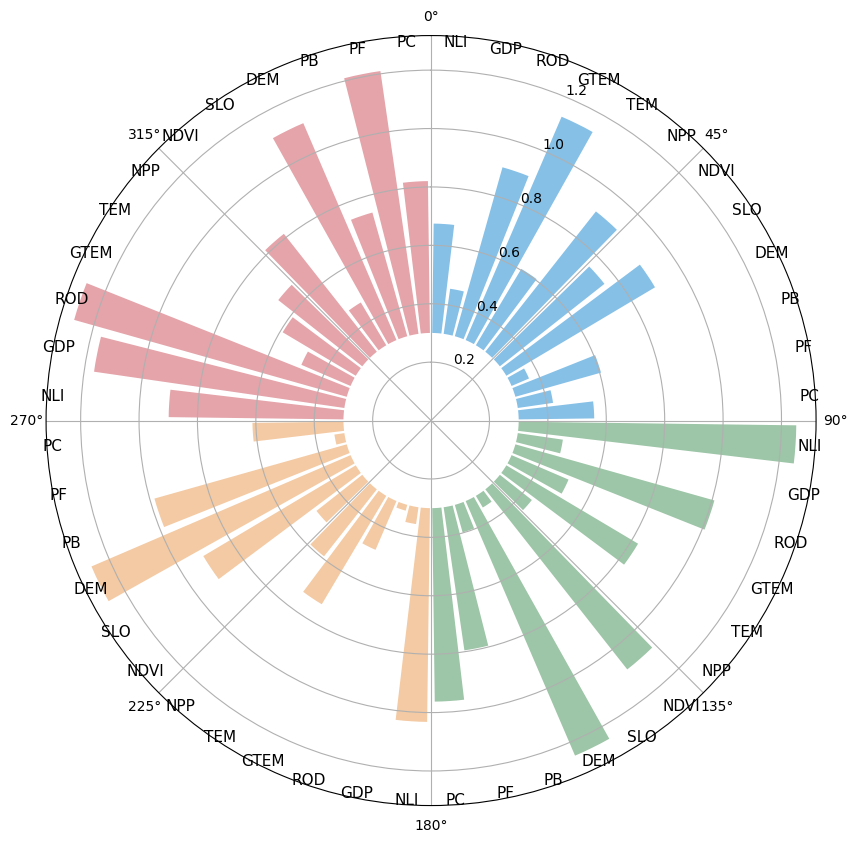

In [6]:
# 绘图
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location("N")  # 设置0°为正北方向
ax.set_theta_direction(-1)

# 遍历每一行数据（每个年份）
for i, row in df.iterrows():
    # 以扇区中心为基准，计算扇区起始和结束角度
    sector_center = (i + 0.5) * wedge_angle
    start_angle = sector_center - wedge_angle / 2
    end_angle = sector_center + wedge_angle / 2
    # 对于负角度进行调整（转换到0-360范围内）
    if start_angle < 0:
        start_angle += 2 * np.pi
        end_angle += 2 * np.pi

    # 当前年份所有指标数据（去除年份列）
    indicators = row.drop('year')
    num_indicators = len(indicators)

    # 将当前扇区均分为num_indicators份，每份中心作为柱子绘制位置
    delta = (end_angle - start_angle) / num_indicators
    bar_angles = np.linspace(start_angle + delta/2, end_angle - delta/2, num_indicators)
    # 柱形宽度设为分段宽度的一定比例，保证柱子之间有间隔
    bar_width = delta * 0.8

    # 绘制每个指标的柱状图并添加标签
    for j, (cat, value) in enumerate(indicators.items()):
        bar = ax.bar(bar_angles[j], value, width=bar_width, bottom=bottom,
                     color=colors[i % len(colors)], edgecolor='k', alpha=1, lw=0)

        # 添加文本标签
        text_radius = 1.3
        ax.text(bar_angles[j], text_radius, cat, ha='center', va='center', fontsize=11)

plt.show()

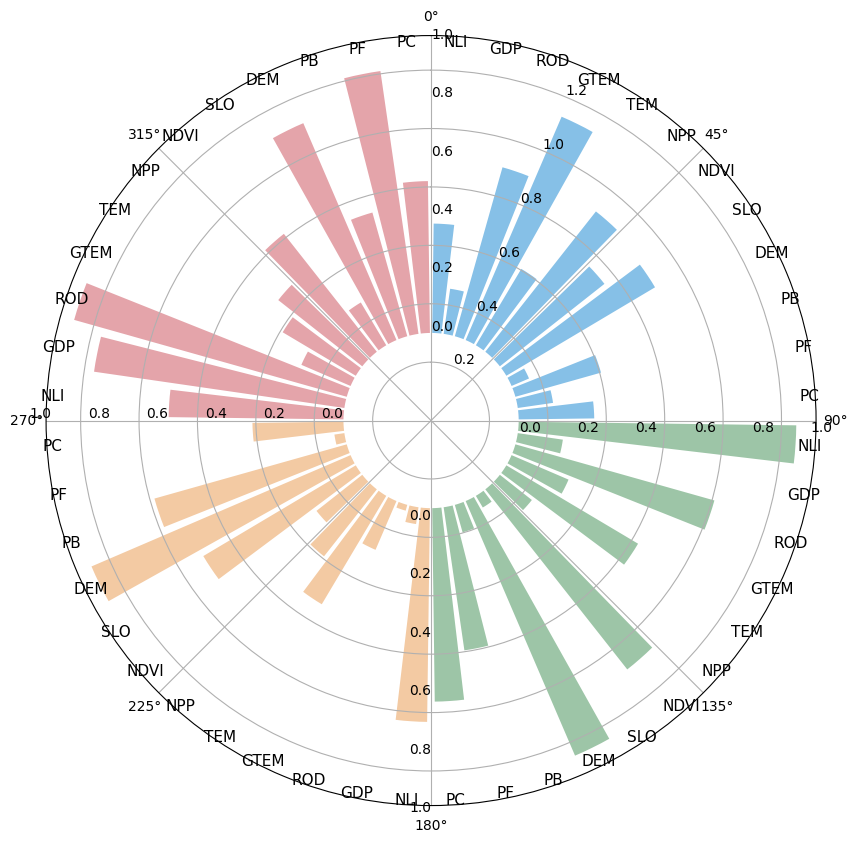

In [7]:
# 绘图
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location("N")  # 设置0°为正北方向
ax.set_theta_direction(-1)

# 遍历每一行数据（每个年份）
for i, row in df.iterrows():
    # 以扇区中心为基准，计算扇区起始和结束角度
    sector_center = (i + 0.5) * wedge_angle
    start_angle = sector_center - wedge_angle / 2
    end_angle = sector_center + wedge_angle / 2
    # 对于负角度进行调整（转换到0-360范围内）
    if start_angle < 0:
        start_angle += 2 * np.pi
        end_angle += 2 * np.pi

    # 当前年份所有指标数据（去除年份列）
    indicators = row.drop('year')
    num_indicators = len(indicators)
    
    # 将当前扇区均分为num_indicators份，每份中心作为柱子绘制位置
    delta = (end_angle - start_angle) / num_indicators
    bar_angles = np.linspace(start_angle + delta/2, end_angle - delta/2, num_indicators)
    # 柱形宽度设为分段宽度的一定比例，保证柱子之间有间隔
    bar_width = delta * 0.8
    
    # 绘制每个指标的柱状图
    for j, (cat, value) in enumerate(indicators.items()):
        ax.bar(bar_angles[j], value, width=bar_width, bottom=bottom,
               color=colors[i % len(colors)], edgecolor='k', alpha=1, lw=0)
        
        # 添加文本标签
        text_radius = 1.3
        ax.text(bar_angles[j], text_radius, cat, ha='center', va='center', fontsize=11)


# 添加每个扇区（年份）的y刻度值显示
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
for i in range(N_years):
    # 计算当前扇区边界（取右侧边界end_angle作为文本放置位置）
    sector_center = (i + 0.5) * wedge_angle
    start_angle = sector_center - wedge_angle / 2
    end_angle = sector_center + wedge_angle / 2
    if start_angle < 0:
        start_angle += 2 * np.pi
        end_angle += 2 * np.pi
    
    # 在当前扇区边缘（end_angle）依次添加tick标签
    for tick in ticks:
        r = bottom + tick  # 由于bottom不为0，这里计算实际半径位置
        angle_text = end_angle  # 统一在扇区右侧边界放置
        angle_deg = np.degrees(angle_text)
        va='center'
        # 为了保证文本易读，调整水平对齐和旋转
        if angle_deg == 90:
            ha = 'left'
            va = 'top'
            rotation = angle_deg + 270
        elif angle_deg == 180:
            ha = 'right'
            va = 'top'
            rotation = angle_deg + 180
        elif angle_deg == 270:
            ha = 'right'
            va = 'bottom'
            rotation = angle_deg + 90
        else:
            ha = 'left'
            va = 'bottom'
            rotation = angle_deg
        
        ax.text(angle_text, r, f"{tick:.1f}", ha=ha, va=va,
                rotation=rotation, rotation_mode='anchor', fontsize=10, color='k')

plt.show()

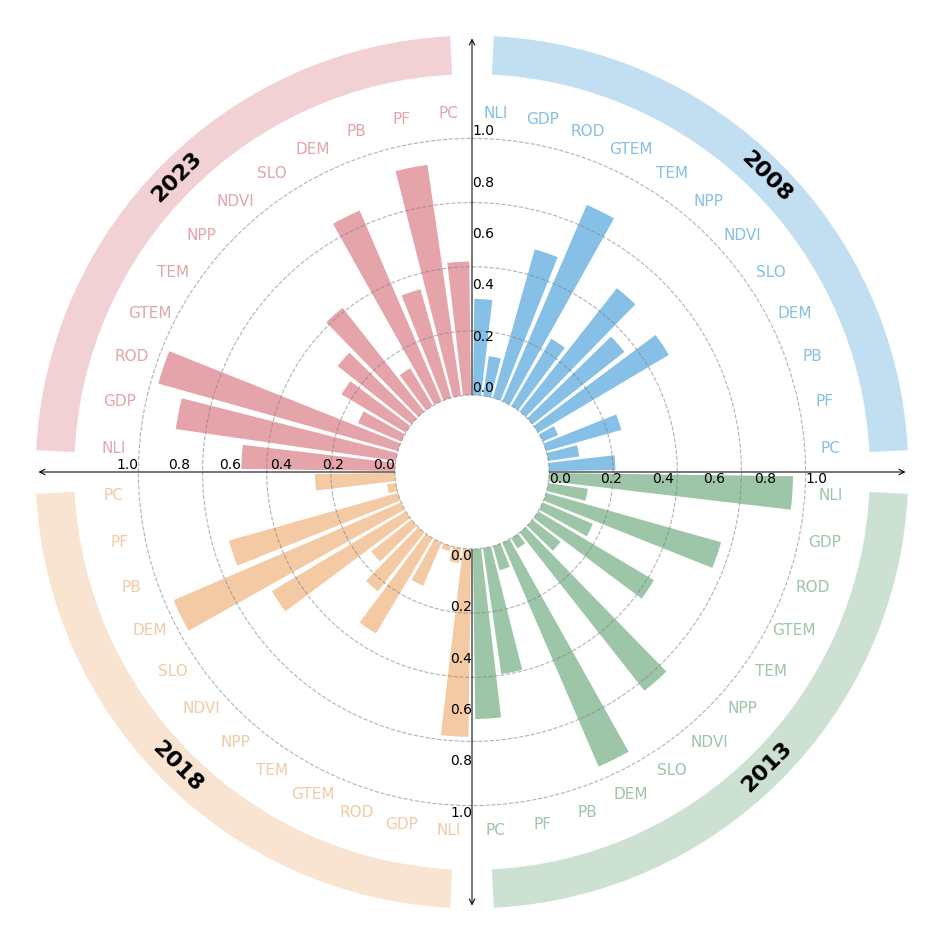

In [8]:
# 绘图
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location("N")  # 设置0°为正北方向
ax.set_theta_direction(-1)

# 遍历每一行数据（每个年份）
for i, row in df.iterrows():
    # 以扇区中心为基准，计算扇区起始和结束角度
    sector_center = (i + 0.5) * wedge_angle
    start_angle = sector_center - wedge_angle / 2
    end_angle = sector_center + wedge_angle / 2
    # 对于负角度进行调整（转换到0-360范围内）
    if start_angle < 0:
        start_angle += 2 * np.pi
        end_angle += 2 * np.pi

    # 当前年份所有指标数据（去除年份列）
    indicators = row.drop('year')
    num_indicators = len(indicators)
    
    # 将当前扇区均分为num_indicators份，每份中心作为柱子绘制位置
    delta = (end_angle - start_angle) / num_indicators
    bar_angles = np.linspace(start_angle + delta/2, end_angle - delta/2, num_indicators)
    # 柱形宽度设为分段宽度的一定比例，保证柱子之间有间隔
    bar_width = delta * 0.8
    
    # 绘制每个指标的柱状图
    for j, (cat, value) in enumerate(indicators.items()):
        ax.bar(bar_angles[j], value, width=bar_width, bottom=bottom,
               color=colors[i % len(colors)], edgecolor='k', alpha=1, lw=0)
        
        # 添加文本标签
        text_radius = 1.4
        ax.text(bar_angles[j], text_radius, cat, ha='center', va='center', fontsize=11, color=colors[i % len(colors)])


# 添加每个扇区（年份）的y刻度值显示
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
for i in range(N_years):
    # 计算当前扇区边界（取右侧边界end_angle作为文本放置位置）
    sector_center = (i + 0.5) * wedge_angle
    start_angle = sector_center - wedge_angle / 2
    end_angle = sector_center + wedge_angle / 2
    if start_angle < 0:
        start_angle += 2 * np.pi
        end_angle += 2 * np.pi
    
    # 在当前扇区边缘（end_angle）依次添加tick标签
    for tick in ticks:
        r = bottom + tick  # 由于bottom不为0，这里计算实际半径位置
        angle_text = end_angle  # 统一在扇区右侧边界放置
        angle_deg = np.degrees(angle_text)
        va='center'
        # 为了保证文本易读，调整水平对齐和旋转
        if angle_deg == 90:
            ha = 'left'
            va = 'top'
            rotation = angle_deg + 270
        elif angle_deg == 180:
            ha = 'right'
            va = 'top'
            rotation = angle_deg + 180
        elif angle_deg == 270:
            ha = 'right'
            va = 'bottom'
            rotation = angle_deg + 90
        else:
            ha = 'left'
            va = 'bottom'
            rotation = angle_deg
        
        ax.text(angle_text, r, f"{tick:.1f}", ha=ha, va=va,
                rotation=rotation, rotation_mode='anchor', fontsize=10, color='k')


# 设置刻度和标签为对应年份
# sector_centers = [(i + 0.5)*wedge_angle for i in range(N_years)]
# ax.set_xticks(sector_centers)
# ax.set_xticklabels([str(year) for year in years], fontsize=12, fontweight='bold')
ax.set_xticklabels([])  # 去除标签
ax.xaxis.grid(False)  # 去除x轴
ax.yaxis.grid(False)  # 去除y轴
ax.set_yticklabels([])

# 设置y范围
ax.set_ylim(0,1.8)

# 自定义圆环
r_values = [0.3, 0.55, 0.8, 1.05, 1.3]  # 根据自己的数据调整
theta = np.linspace(0, 2*np.pi, 100)  # 角度从0到360°
for r in r_values:
    ax.plot(theta, [r] * len(theta), '--', color='gray', linewidth=0.8, alpha=0.6)  # 画虚线
ax.spines['polar'].set_visible(False)  # 去掉最外侧的框

# 边缘向外延伸的箭头
arrow_length = 1.4  # 长度
for i in range(N_years):
    # 计算当前扇区边界
    sector_center = (i + 0.5) * wedge_angle
    start_angle_rad = sector_center - wedge_angle / 2
    end_angle_rad = sector_center + wedge_angle / 2
    ax.annotate('', xy=(end_angle_rad, bottom + arrow_length), xytext=(end_angle_rad, bottom-0.01),
                arrowprops=dict(arrowstyle='->', color='k', lw=0.75))

# 绘制每个年份的半环
semi_circle_bottom = 1.55
semi_circle_top = 1.7
semi_circle_height = semi_circle_top - semi_circle_bottom
for i in range(N_years):
    # 计算当前扇区的起始和结束角度
    sector_center = (i + 0.5) * wedge_angle
    start_angle_rad = sector_center - wedge_angle / 2
    end_angle_rad = sector_center + wedge_angle / 2
    width_semi = end_angle_rad - start_angle_rad - 0.1  # 留一点间隙

    # 使用 bar 函数绘制填充的弧形
    ax.bar(x=(start_angle_rad + end_angle_rad) / 2,  # 中心角度
           height=semi_circle_height,
           width=width_semi,
           bottom=semi_circle_bottom,
           color=colors[i % len(colors)],
           alpha=0.5,
           edgecolor='none') # 可选：去除边缘
    
    # 添加年份标签到半环内部
    # 需要注意，这里是按照四个年份的数据进行的标注，如果数据大于4，需要调整
    text_angle = (start_angle_rad + end_angle_rad) / 2
    text_radius = (semi_circle_bottom + semi_circle_top) / 2
    angle_deg = np.degrees(end_angle_rad)
    if angle_deg >=0 and angle_deg <= 90:
        rotation =  -45
    
    elif angle_deg >=90 and angle_deg <= 180:
        rotation = 45

    elif angle_deg >=180 and angle_deg <= 270:
        rotation = -45

    else:
        rotation = 45
        
    ax.text(text_angle, text_radius, str(years[i]), ha='center', va='center', fontsize=16, rotation=rotation, color='k', fontweight='bold')


plt.show()